# Métricas, datos y calibración inteligente

## Lectura de los archivos de datos base y experimentales

Importamos librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import seaborn as sns
# import time

Importamos los datos de *referencia*

In [2]:
#Importar la hoja Normal y dejar las columnas Date&Time (A) y PM2.5 (C), se elimina la segunda fila y los datos nulos
referencia_og = pd.read_excel("../../Datos/datosSensores/Datos Estaciones AMB_mod.xlsx",
                       usecols="A,C", skiprows=[1], names=["Date", "PM25"]).dropna()

#Eliminamos los datos que no son float
referencia_og = referencia_og[referencia_og["PM25"].apply(lambda x: isinstance(x, (float, int)))]

#Convertimos PM25 a float y Date a datetime
referencia_og["PM25"] = referencia_og["PM25"].astype(float)
referencia_og["Date"] = pd.to_datetime(referencia_og["Date"])

#Usamos date como indice
referencia_og = referencia_og.set_index("Date")

referencia_og.info()
referencia_og.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7086 entries, 2018-10-01 00:00:00 to 2019-08-31 23:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM25    7086 non-null   float64
dtypes: float64(1)
memory usage: 110.7 KB


,PM25
Date,
2018-10-01 00:00:00,6.4
2018-10-01 01:00:00,6.4
2018-10-01 02:00:00,6.7
2018-10-01 03:00:00,6.0
2018-10-01 04:00:00,7.3


Importamos los datos *bajo costo*

In [3]:
#Importamos los diferentes datos de la estacion segun mes
prename = "..\..\Datos\datosSensores\mediciones_clg_normalsup_pm25_a_"
noviembre18 = pd.read_csv(prename+"2018-11-01T00_00_00_2018-11-30T23_59_59.csv", usecols=[0,2], names=["Date", "PM25"], skiprows=1)
diciembre18 = pd.read_csv(prename+"2018-12-01T00_00_00_2018-12-31T23_59_59.csv", usecols=[0,2], names=["Date", "PM25"], skiprows=1)
abril19 = pd.read_csv(prename+"2019-04-01T00_00_00_2019-04-30T23_59_59.csv", usecols=[0,2], names=["Date", "PM25"], skiprows=1)
mayo19 = pd.read_csv(prename+"2019-05-01T00_00_00_2019-05-31T23_59_59.csv", usecols=[0,2], names=["Date", "PM25"], skiprows=1)
junio19 = pd.read_csv(prename+"2019-06-01T00_00_00_2019-06-30T23_59_59.csv", usecols=[0,2], names=["Date", "PM25"], skiprows=1)
julio19 = pd.read_csv(prename+"2019-07-01T00_00_00_2019-07-31T23_59_59.csv", usecols=[0,2], names=["Date", "PM25"], skiprows=1)
agosto19 = pd.read_csv(prename+"2019-08-01T00_00_00_2019-08-31T23_59_59.csv", usecols=[0,2], names=["Date", "PM25"], skiprows=1)

#Convertimos PM25 a float y Date a datetime
for i in [noviembre18, diciembre18, abril19, mayo19, junio19, julio19, agosto19]:
    i["PM25"] = i["PM25"].astype(float)
    i["Date"] = pd.to_datetime(i["Date"])

#Ordenamos los datos por fecha de menor a mayor y unimos los datos de la estacion
estacion_og = pd.concat([noviembre18, diciembre18, abril19, mayo19, junio19, julio19, agosto19]).sort_values(by="Date").reset_index(drop=True)

#Comvertimos el formato temporal de la estacion al de referencia datetime64[ns]
estacion_og["Date"] = estacion_og["Date"].dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')

#Usamos date como indice
estacion_og = estacion_og.set_index("Date")

#Usamos solo una cifra significativa (las cifras de referencia)
estacion_og["PM25"] = estacion_og["PM25"].round(1)

estacion_og.info()
estacion_og.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5009 entries, 2018-11-03 23:32:49 to 2019-09-01 04:03:01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM25    5009 non-null   float64
dtypes: float64(1)
memory usage: 78.3 KB


,PM25
Date,
2018-11-03 23:32:49,9.1
2018-11-03 23:37:50,9.1
2018-11-03 23:42:50,8.6
2018-11-03 23:47:49,8.7
2018-11-03 23:52:49,8.7


Visualizamos los datos para tener idea de sus rangos

In [ ]:
#Graficamos los datos de PM2.5 y una semana de julio de referencia
plt.figure(figsize=(15,5))
# plt.scatter(referencia.index, referencia["PM25"], s=10, label="Referencia")
plt.scatter(referencia_og.index, referencia_og["PM25"], s=10, label="Referencia")
# plt.scatter(estaciones.index, estaciones.PM25, s=10, label="Estaciones")
plt.scatter(estacion_og.index, estacion_og.PM25, s=10, label="Estacion")
plt.title("Datos de referencia y de la estación a calibrar")
plt.xlabel("Fecha")
plt.ylabel("PM2.5 (µg/m3)")
plt.legend()
plt.grid()
plt.show()

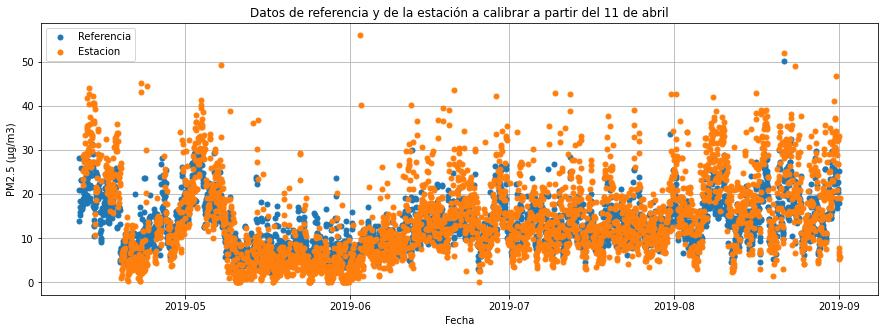

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3347 entries, 2019-04-11 17:29:20 to 2019-09-01 04:03:01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM25    3347 non-null   float64
dtypes: float64(1)
memory usage: 52.3 KB


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3431 entries, 2019-04-11 00:00:00 to 2019-08-31 23:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM25    3431 non-null   float64
dtypes: float64(1)
memory usage: 53.6 KB


In [4]:
#Recortamos los datos al intervalo continuo donde hay más datos
referencia = referencia_og["2019-04-11":]
estacion = estacion_og["2019-04-11":]

#Graficamos los datos de PM2.5
plt.figure(figsize=(15,5))
plt.plot(referencia["PM25"], ".", label="Referencia", markersize=10)
plt.plot(estacion.PM25, ".", label="Estacion", markersize=10)
plt.title("Datos de referencia y de la estación a calibrar a partir del 11 de abril")
plt.xlabel("Fecha")
plt.ylabel("PM2.5 (µg/m3)")
plt.legend()
plt.grid()
plt.show()

estacion.info()
print("\n")
referencia.info()

## Uso del promedio movil para comparar los datos

Definición de media movil y la distancia para los datos

In [5]:
# Funcion para hacer la media movil de ambos
'''
Definimos la función de media movil que realiza el primedio de los
datos (array con [referencia, estacion]) en el ancho de la ventana en cada paso de tiempo
'''
def MediaMovil(data, window, step):
    ref_media = pd.DataFrame(index=pd.date_range(data[0].index[0], data[0].index[-1], freq=step), columns=["PM25"])
    est_media = pd.DataFrame(index=pd.date_range(data[0].index[0], data[0].index[-1], freq=step), columns=["PM25"])
    for i in pd.date_range(data[0].index[0], data[0].index[-1], freq=step):
        ref_media["PM25"][i] = round(data[0]["PM25"][i-pd.Timedelta(window)/2:i+pd.Timedelta(window)/2].mean(), 1)
        est_media["PM25"][i] = round(data[1]["PM25"][i-pd.Timedelta(window)/2:i+pd.Timedelta(window)/2].mean(), 1)
    datos = pd.merge(ref_media, est_media, left_index=True, right_index=True, how="inner", suffixes=("_ref", "_est"))
    return datos.dropna().astype(float)

#Funcion para hacer la media movil solo de las estaciones
# def MediaMovil2(data, step):
#     est_media = pd.DataFrame(index=data[0].index, columns=["PM25"])
#     for i in data[0].index:
#         est_media["PM25"][i] = round(data[1]["PM25"][i-pd.Timedelta("1H")/2:i+pd.Timedelta("1H")/2].mean(), 1)
#     datos = pd.merge(data[0], est_media, left_index=True, right_index=True, how="inner", suffixes=("_ref", "_est"))
#     return datos.dropna().astype(float)

def mediasoloest (data, step):
    est_media = pd.DataFrame(index=pd.date_range(data[0].index[0], data[0].index[-1], freq=step), columns=["PM25"])
    for i in pd.date_range(data[0].index[0], data[0].index[-1], freq=step):
        est_media["PM25"][i] = round(data[1]["PM25"][i-pd.Timedelta("1H")/2:i+pd.Timedelta("1H")/2].mean(), 1)
    return est_media.dropna().astype(float)

#Definimos la distancia euclidea entre los datos de la estacion y la referencia
def distancia(x, y):
    error = 0
    for i in range(len(x)):
        error += (x[i] - y[i])**2
    return round(np.sqrt(error), 3)

# Por el comportamiento físico de una variable climática, se decide usar 1 hora como ventana
# temporal, esto con el fin de que la media movil sea lo más representativa posible
ventana = "1H"

Verificamos si el paso temporal permite una mejora en los datos

In [6]:
# Realizamos la media sin hacer solapamiento de las ventanas
step = "60T"
# datos_ventana = MediaMovil([referencia, estacion.shift(freq=pd.Timedelta("-4H"))], ventana, step)
datos_ventana = MediaMovil([referencia, estacion], ventana, step)

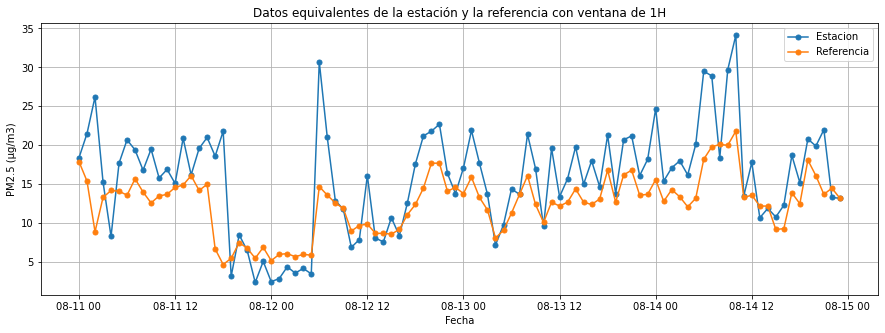

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3322 entries, 2019-04-11 17:00:00 to 2019-08-31 23:00:00
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PM25_ref  3322 non-null   float64
 1   PM25_est  3322 non-null   float64
dtypes: float64(2)
memory usage: 206.9 KB


In [9]:
#Graficamos
plt.figure(figsize=(15,5))
# plt.plot(data["PM25"], ".", label="Referencia", markersize=10)
plt.plot(datos_ventana["PM25_est"]["2019-08-11":"2019-08-14"], ".-", label="Estacion", markersize=10)
plt.plot(datos_ventana["PM25_ref"]["2019-08-11":"2019-08-14"], ".-", label="Referencia", markersize=10)
plt.title("Datos equivalentes de la estación y la referencia con ventana de " + ventana)
plt.xlabel("Fecha")
plt.ylabel("PM2.5 (μg/m3)")
plt.legend()
plt.grid()
plt.show()

datos_ventana.info()

In [7]:
# Realizamos la media con solapamiento de 20mins (1/3) de las ventanas
prueba = mediasoloest([referencia, estacion], "40T")

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(datos_ventana["PM25_est"], ".", label="Estacion 60T", markersize=10)
plt.plot(prueba["PM25"], ".", label="Estacion 20T", markersize=6)
plt.title("Datos con y sin overlap")
plt.xlabel("Fecha")
plt.ylabel("PM2.5 (μg/m3)")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(15,5))
plt.plot(prueba["2019-08-11":"2019-08-15"]["PM25"], ".-", label="Estacion con solapamiento de 2/3", markersize=10)
plt.plot(datos_ventana["2019-08-11":"2019-08-15"]["PM25_est"], ".-", label="Estacion sin solapamiento", markersize=10)
plt.title("Datos con y sin overlap")
plt.xlabel("Fecha")
plt.ylabel("PM2.5 (μg/m3)")
plt.legend()
plt.grid()
plt.show()

dfprueba = pd.merge(datos_ventana, prueba, left_index=True, right_index=True, how="inner")

plt.figure(figsize=(10,10))
plt.plot(dfprueba["PM25_est"], dfprueba["PM25"], ".", markersize=15)
plt.plot(dfprueba["PM25_est"], np.polyval(np.polyfit(dfprueba["PM25_est"], dfprueba["PM25"], 1), dfprueba["PM25"]), "r-")
plt.title("Relacion de datos con y sin overlap")
plt.xlabel("Estacion sin solapamiento")
plt.ylabel("Estacion con solapamiento de 2/3")
plt.grid()
plt.show()

print(np.polyfit(dfprueba["PM25_est"], dfprueba["PM25"], 1))

## Imiplementación del modelo lineal para el ajúste de datos

División del conjunto de datos en modelado y prueba

La ecuación de la recta de regresión es: PM referencia =  0.3748570893530069 PM estacion +  7.162460979612151


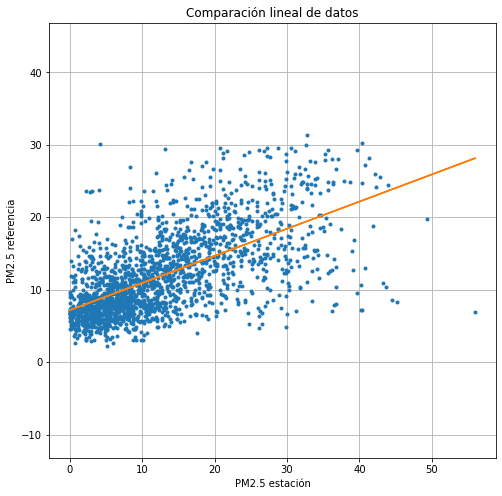

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1956 entries, 2019-04-11 17:00:00 to 2019-07-06 01:00:00
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PM25_ref  1956 non-null   float64
 1   PM25_est  1956 non-null   float64
dtypes: float64(2)
memory usage: 45.8 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1366 entries, 2019-07-06 02:00:00 to 2019-08-31 23:00:00
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PM25_ref  1366 non-null   float64
 1   PM25_est  1366 non-null   float64
dtypes: float64(2)
memory usage: 32.0 KB


In [8]:
#Utilizamos 2 tercios de datos para modelado y 1 tercio para test
fraccion_division = 3/5
modelado = datos_ventana[:datos_ventana.index[0]+(datos_ventana.index[-1]-datos_ventana.index[0])*fraccion_division].copy()
test = datos_ventana[datos_ventana.index[0]+(datos_ventana.index[-1]-datos_ventana.index[0])*fraccion_division:].copy()


#Realizamos un ajuste de minimos cuadrados sobre los datos
regresion = np.polyfit(modelado["PM25_est"], modelado["PM25_ref"], 1)
print("La ecuación de la recta de regresión es: PM referencia = ", regresion[0], "PM estacion + ", regresion[1])

#Revisamos la linealidad de los datos
plt.figure(figsize=(8,8))
plt.plot(modelado["PM25_est"], modelado["PM25_ref"], ".")
plt.plot(modelado["PM25_est"], np.polyval(regresion, modelado["PM25_est"]), "-")
plt.title("Comparación lineal de datos")
plt.xlabel("PM2.5 estación")
plt.ylabel("PM2.5 referencia")
plt.axis("equal")
plt.grid()
plt.show()

modelado.info()
test.info()

Aplicación del modelo lineal

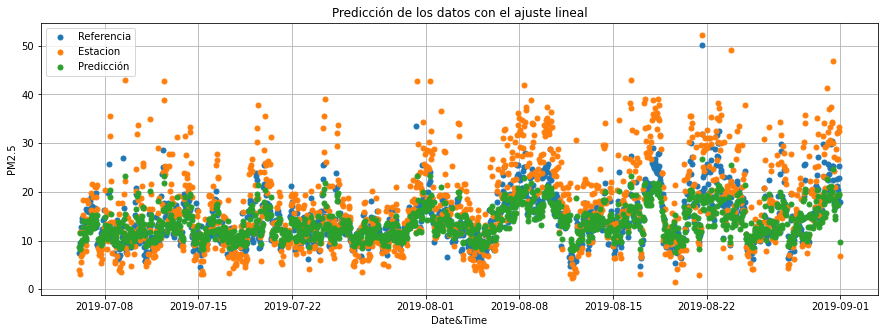

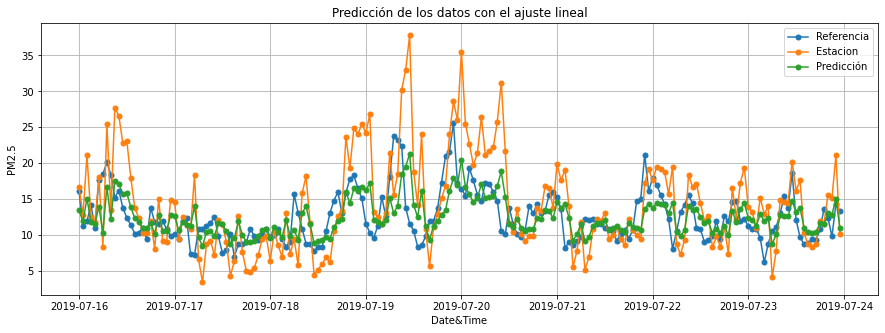

In [9]:
#Realizamos la predicción
prediccion = (regresion[0]*test["PM25_est"] + regresion[1]).copy()
# prediccion = (wd[0]*(2.75*test["PM25_est"] - 20.2)+wd[1]).copy()
prediccion.name = "PM25_pred"

#Graficamos
plt.figure(figsize=(15,5))
plt.plot(test["PM25_ref"], ".", label="Referencia", markersize=10)
plt.plot(test["PM25_est"], ".", label="Estacion", markersize=10)
plt.plot(prediccion, ".", label="Predicción", markersize=10)
plt.title("Predicción de los datos con el ajuste lineal")
plt.xlabel("Date&Time")
plt.ylabel("PM2.5")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(15,5))
plt.plot(test["2019-07-16":"2019-07-23"]["PM25_ref"], ".-", label="Referencia", markersize=10)
plt.plot(test["2019-07-16":"2019-07-23"]["PM25_est"], ".-", label="Estacion", markersize=10)
plt.plot(prediccion["2019-07-16":"2019-07-23"], ".-", label="Predicción", markersize=10)
plt.title("Predicción de los datos con el ajuste lineal")
plt.xlabel("Date&Time")
plt.ylabel("PM2.5")
plt.legend()
plt.grid()


Estimacion de errores y mejoras en la distancia euclidea

Error de prediccion: 130.629
Error inicial: 245.303
Reduccion porcentual del error: 46.7478995364916 %
18.659611331058393


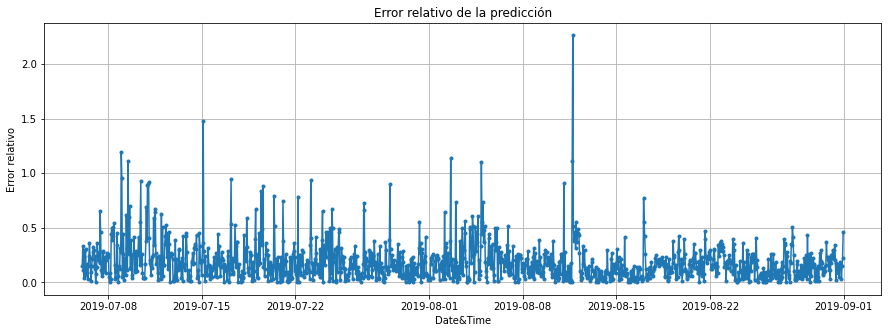

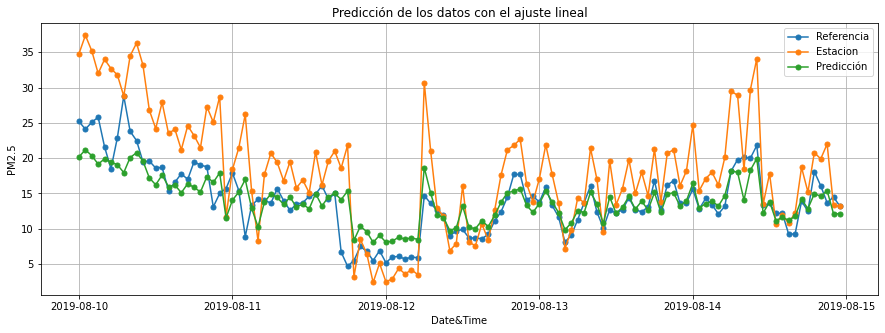

In [45]:
#Calculamos el error de prediccion
error_prediccion = distancia(test["PM25_ref"], prediccion)
error_test = distancia(test["PM25_ref"], test["PM25_est"])
# error_prediccion1 = distancia(test["PM25_ref"][:"2019-06-30"], prediccion[:"2019-06-30"])
# error_test1 = distancia(test["PM25_ref"][:"2019-06-30"], test["PM25_est"][:"2019-06-30"])
# error_prediccion2 = distancia(test["PM25_ref"]["2019-07-01":"2019-07-31"], prediccion["2019-07-01":"2019-07-31"])
# error_test2 = distancia(test["PM25_ref"]["2019-07-01":"2019-07-31"], test["PM25_est"]["2019-07-01":"2019-07-31"])
# error_prediccion3 = distancia(test["PM25_ref"]["2019-08-01":"2019-08-31"], prediccion["2019-08-01":"2019-08-31"])
# error_test3 = distancia(test["PM25_ref"]["2019-08-01":"2019-08-31"], test["PM25_est"]["2019-08-01":"2019-08-31"])

# print("Error de prediccion:", distancia(test["PM25_ref"], prediccion), "Error de test: ", distancia(test["PM25_ref"], test["PM25_est"]))

print("Error de prediccion:", error_prediccion)
print("Error inicial:", error_test)
print("Reduccion porcentual del error:", (error_test-error_prediccion)/error_test*100, "%")
# print("La distancia euclidea entre los datos calibrados y la referencia es de", error_prediccion1)
# print("La distancia original entre los datos de la estación y la referencia es de", error_test1)
# print("La reducción porcentual de error es de", round((error_test1 - error_prediccion1)/error_test1*100, 3), "%")
# print("La distancia euclidea entre los datos calibrados y la referencia es de", error_prediccion2)
# print("La distancia original entre los datos de la estación y la referencia es de", error_test2)
# print("La reducción porcentual de error es de", round((error_test2 - error_prediccion2)/error_test2*100, 3), "%")
# print("La distancia euclidea entre los datos calibrados y la referencia es de", error_prediccion3)
# print("La distancia original entre los datos de la estación y la referencia es de", error_test3)
# print("La reducción porcentual de error es de", round((error_test3 - error_prediccion3)/error_test3*100, 3), "%")

print((np.abs(test["PM25_ref"] - prediccion)/test["PM25_ref"]*100).mean())
# print((np.abs(test["PM25_ref"][:"2019-06-30"] -  prediccion[:"2019-06-30"])/test["PM25_ref"][:"2019-06-30"]).mean()*100)
# print((np.abs(test["PM25_ref"]["2019-07-01":"2019-07-31"] -  prediccion["2019-07-01":"2019-07-31"])/test["PM25_ref"]["2019-07-01":"2019-07-31"]).mean()*100)
# print((np.abs(test["PM25_ref"]["2019-08-01":] -  prediccion["2019-08-01":])/test["PM25_ref"]["2019-08-01":]).mean()*100)


# print(np.abs(distancia(test["PM25_ref"], prediccion) - distancia(test["PM25_ref"], test["PM25_est"])) / distancia(test["PM25_ref"], test["PM25_est"])*100)

plt.figure(figsize=(15,5))
plt.plot(np.abs(test["PM25_ref"] -  prediccion)/test["PM25_ref"], ".-")
plt.title("Error relativo de la predicción")
plt.xlabel("Date&Time")
plt.ylabel("Error relativo")
plt.grid()
plt.show()

plt.figure(figsize=(15,5))
plt.plot(test["2019-08-10":"2019-08-14"]["PM25_ref"], ".-", label="Referencia", markersize=10)
plt.plot(test["2019-08-10":"2019-08-14"]["PM25_est"], ".-", label="Estacion", markersize=10)
plt.plot(prediccion["2019-08-10":"2019-08-14"], ".-", label="Predicción", markersize=10)
plt.title("Predicción de los datos con el ajuste lineal")
plt.xlabel("Date&Time")
plt.ylabel("PM2.5")
plt.legend()
plt.grid()

Visualización de la nueva relacion entre los datos calibrados y la referencia

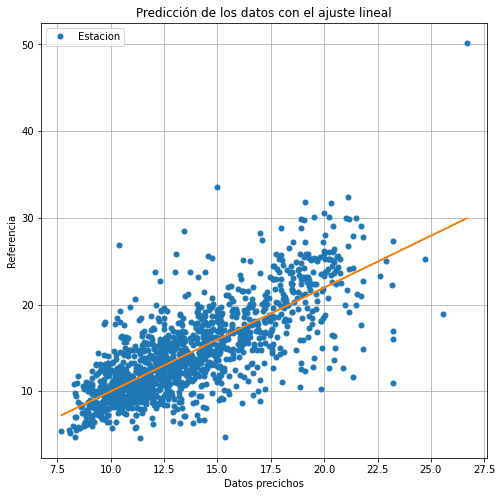

[ 1.19697691 -1.98894082]


In [46]:
plt.figure(figsize=(8,8))
plt.plot(prediccion, test["PM25_ref"], ".", label="Estacion", markersize=10)
plt.plot(prediccion, np.polyval(np.polyfit(prediccion, test["PM25_ref"], 1), prediccion), "-")
plt.title("Predicción de los datos con el ajuste lineal")
plt.xlabel("Datos precichos")
plt.ylabel("Referencia")
plt.legend()
plt.grid()
# plt.xlim(0,40)
# plt.ylim(0,40)
plt.show()
print(np.polyfit(prediccion, test["PM25_ref"], 1))
# print(np.abs(np.polyfit(prediccion, test["PM25_ref"], 1)[0]-1)*100, "%")


## Tolerancia y alcance del modelo lineal

Pendiente de la primera parte: [0.55808832 5.55161158]
Pendiente de la segunda parte: [0.7420911  3.68111652]
Pendiente de la tercera parte: [ 1.30424355 -3.96698405]
Pendiente de la cuarta parte: [ 1.59486965 -6.82988875]


(6.736998183196488, 27.642778056413682, 3.16, 52.440000000000005)

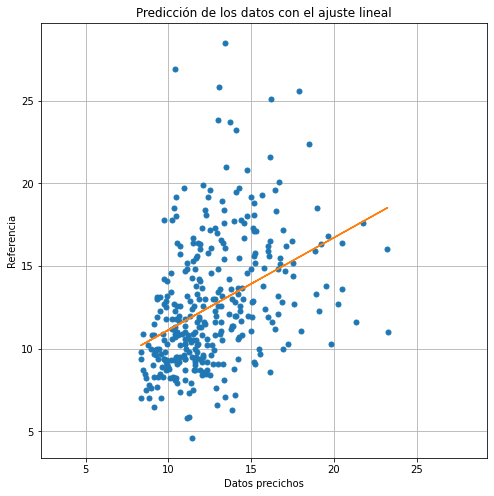

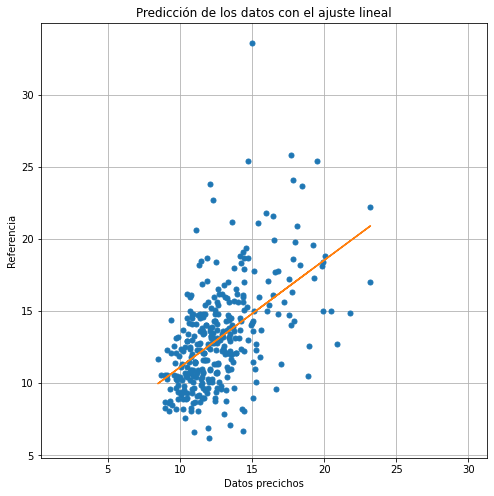

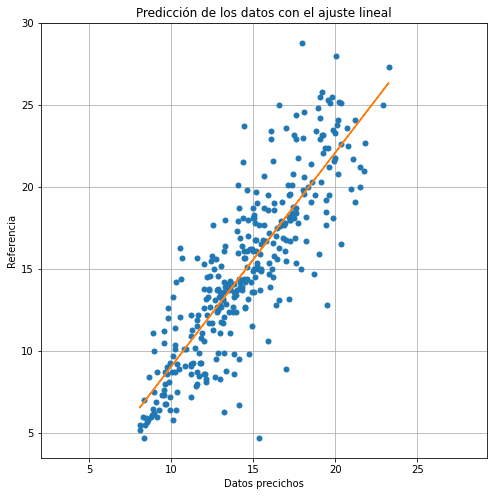

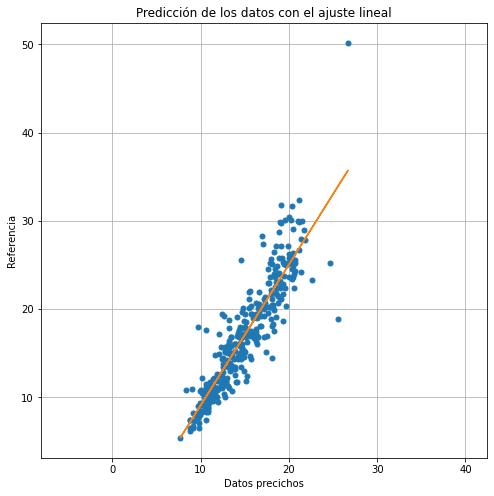

In [10]:
#Dividimos los datos en 4 partes
delta_t = (prediccion.index[-1] - prediccion.index[0])/4
datos_prediccion = pd.merge(prediccion, test, left_index=True, right_index=True, how="inner")

parte1 = datos_prediccion[:datos_prediccion.index[0] + delta_t]
parte2 = datos_prediccion[datos_prediccion.index[0] + delta_t:datos_prediccion.index[0] + 2*delta_t]
parte3 = datos_prediccion[datos_prediccion.index[0] + 2*delta_t:datos_prediccion.index[0] + 3*delta_t]
parte4 = datos_prediccion[datos_prediccion.index[0] + 3*delta_t:datos_prediccion.index[0] + 4*delta_t]
# parte5 = datos_prediccion[datos_prediccion.index[0] + 4*delta_t:datos_prediccion.index[0] + 5*delta_t]
# parte6 = datos_prediccion[datos_prediccion.index[0] + 5*delta_t:datos_prediccion.index[0] + 6*delta_t]
# parte7 = datos_prediccion[datos_prediccion.index[0] + 6*delta_t:datos_prediccion.index[0] + 7*delta_t]
# parte8 = datos_prediccion[datos_prediccion.index[0] + 7*delta_t:]

print("Pendiente de la primera parte:", np.polyfit(parte1["PM25_pred"], parte1["PM25_ref"], 1))
print("Pendiente de la segunda parte:", np.polyfit(parte2["PM25_pred"], parte2["PM25_ref"], 1))
print("Pendiente de la tercera parte:", np.polyfit(parte3["PM25_pred"], parte3["PM25_ref"], 1))
print("Pendiente de la cuarta parte:", np.polyfit(parte4["PM25_pred"], parte4["PM25_ref"], 1))
# print("Pendiente de la quinta parte:", np.polyfit(parte5["PM25_pred"], parte5["PM25_ref"], 1))
# print("Pendiente de la sexta parte:", np.polyfit(parte6["PM25_pred"], parte6["PM25_ref"], 1))
# print("Pendiente de la séptima parte:", np.polyfit(parte7["PM25_pred"], parte7["PM25_ref"], 1))
# print("Pendiente de la octava parte:", np.polyfit(parte8["PM25_pred"], parte8["PM25_ref"], 1))

plt.figure(figsize=(8,8))
plt.plot(parte1["PM25_pred"], parte1["PM25_ref"], ".", markersize=10)
plt.plot(parte1["PM25_pred"], np.polyval(np.polyfit(parte1["PM25_pred"], parte1["PM25_ref"], 1), parte1["PM25_pred"]), "-")
plt.title("Predicción de los datos con el ajuste lineal")
plt.xlabel("Datos precichos")
plt.ylabel("Referencia")
plt.grid()
plt.axis("equal")

plt.figure(figsize=(8,8))
plt.plot(parte2["PM25_pred"], parte2["PM25_ref"], ".", markersize=10)
plt.plot(parte2["PM25_pred"], np.polyval(np.polyfit(parte2["PM25_pred"], parte2["PM25_ref"], 1), parte2["PM25_pred"]), "-")
plt.title("Predicción de los datos con el ajuste lineal")
plt.xlabel("Datos precichos")
plt.ylabel("Referencia")
plt.grid()
plt.axis("equal")

plt.figure(figsize=(8,8))
plt.plot(parte3["PM25_pred"], parte3["PM25_ref"], ".", markersize=10)
plt.plot(parte3["PM25_pred"], np.polyval(np.polyfit(parte3["PM25_pred"], parte3["PM25_ref"], 1), parte3["PM25_pred"]), "-")
plt.title("Predicción de los datos con el ajuste lineal")
plt.xlabel("Datos precichos")
plt.ylabel("Referencia")
plt.grid()
plt.axis("equal")

plt.figure(figsize=(8,8))
plt.plot(parte4["PM25_pred"], parte4["PM25_ref"], ".", markersize=10)
plt.plot(parte4["PM25_pred"], np.polyval(np.polyfit(parte4["PM25_pred"], parte4["PM25_ref"], 1), parte4["PM25_pred"]), "-")
plt.title("Predicción de los datos con el ajuste lineal")
plt.xlabel("Datos precichos")
plt.ylabel("Referencia")
plt.grid()
plt.axis("equal")

# plt.figure(figsize=(8,8))
# plt.plot(parte5["PM25_pred"], parte5["PM25_ref"], ".", markersize=10)
# plt.plot(parte5["PM25_pred"], np.polyval(np.polyfit(parte5["PM25_pred"], parte5["PM25_ref"], 1), parte5["PM25_pred"]), "-")
# plt.title("Predicción de los datos con el ajuste lineal")
# plt.xlabel("Datos precichos")
# plt.ylabel("Referencia")
# plt.grid()
# plt.axis("equal")

# plt.figure(figsize=(8,8))
# plt.plot(parte6["PM25_pred"], parte6["PM25_ref"], ".", markersize=10)
# plt.plot(parte6["PM25_pred"], np.polyval(np.polyfit(parte6["PM25_pred"], parte6["PM25_ref"], 1), parte6["PM25_pred"]), "-")
# plt.title("Predicción de los datos con el ajuste lineal")
# plt.xlabel("Datos precichos")
# plt.ylabel("Referencia")
# plt.grid()
# plt.axis("equal")

# plt.figure(figsize=(8,8))
# plt.plot(parte7["PM25_pred"], parte7["PM25_ref"], ".", markersize=10)  
# plt.plot(parte7["PM25_pred"], np.polyval(np.polyfit(parte7["PM25_pred"], parte7["PM25_ref"], 1), parte7["PM25_pred"]), "-")
# plt.title("Predicción de los datos con el ajuste lineal")
# plt.xlabel("Datos precichos")
# plt.ylabel("Referencia")
# plt.grid()
# plt.axis("equal")

# plt.figure(figsize=(8,8))
# plt.plot(parte8["PM25_pred"], parte8["PM25_ref"], ".", markersize=10)
# plt.plot(parte8["PM25_pred"], np.polyval(np.polyfit(parte8["PM25_pred"], parte8["PM25_ref"], 1), parte8["PM25_pred"]), "-")
# plt.title("Predicción de los datos con el ajuste lineal")
# plt.xlabel("Datos precichos")
# plt.ylabel("Referencia")
# plt.grid()
# plt.axis("equal")

Porcentaje de mejora en la distancia ecuclidea: parte 1:  47.363217628838875 %
Porcentaje de mejora en la distancia ecuclidea: parte 2:  46.117781190376476 %
Pendiente de la primera parte: [0.64458053 4.69260539]
Pendiente de la segunda parte: [ 1.46999071 -5.66948876]


(6.736998183196488, 27.642778056413682, 2.4250000000000003, 52.475)

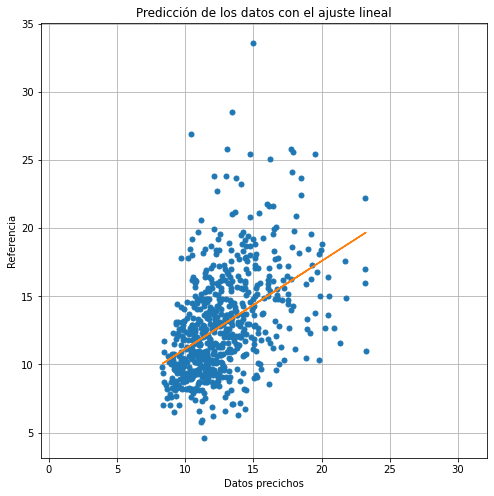

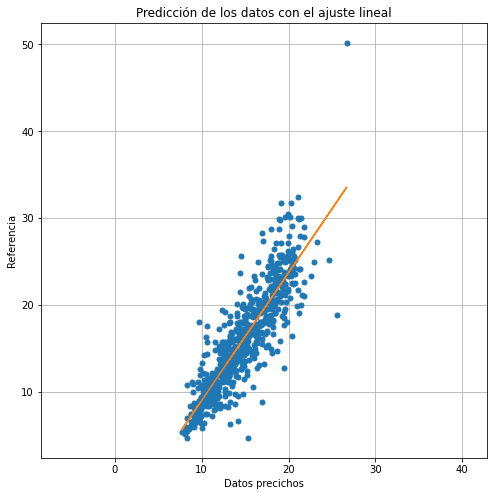

In [12]:
#Dividimos los datos en 4 partes
delta_t = (prediccion.index[-1] - prediccion.index[0])/2
datos_prediccion = pd.merge(prediccion, test, left_index=True, right_index=True, how="inner")

parte1 = datos_prediccion[:datos_prediccion.index[0] + delta_t]
parte2 = datos_prediccion[datos_prediccion.index[0] + delta_t:datos_prediccion.index[0] + 2*delta_t]
# parte3 = datos_prediccion[datos_prediccion.index[0] + 2*delta_t:datos_prediccion.index[0] + 3*delta_t]
# parte4 = datos_prediccion[datos_prediccion.index[0] + 3*delta_t:datos_prediccion.index[0] + 4*delta_t]
# parte5 = datos_prediccion[datos_prediccion.index[0] + 4*delta_t:datos_prediccion.index[0] + 5*delta_t]
# parte6 = datos_prediccion[datos_prediccion.index[0] + 5*delta_t:datos_prediccion.index[0] + 6*delta_t]
# parte7 = datos_prediccion[datos_prediccion.index[0] + 6*delta_t:datos_prediccion.index[0] + 7*delta_t]
# parte8 = datos_prediccion[datos_prediccion.index[0] + 7*delta_t:]

print("Porcentaje de mejora en la distancia ecuclidea: parte 1: ", np.abs(distancia(parte1["PM25_pred"], parte1["PM25_ref"])-distancia(parte1["PM25_ref"], parte1["PM25_est"]))/distancia(parte1["PM25_ref"], parte1["PM25_est"])*100, "%")
print("Porcentaje de mejora en la distancia ecuclidea: parte 2: ", np.abs(distancia(parte2["PM25_pred"], parte2["PM25_ref"])-distancia(parte2["PM25_ref"], parte2["PM25_est"]))/distancia(parte2["PM25_ref"], parte2["PM25_est"])*100, "%")
# print("Porcentaje de mejora en la distancia ecuclidea: parte 3: ", np.abs(distancia(parte3["PM25_pred"], parte3["PM25_ref"])-distancia(parte3["PM25_ref"], parte3["PM25_est"]))/distancia(parte3["PM25_ref"], parte3["PM25_est"])*100, "%")
# print("Porcentaje de mejora en la distancia ecuclidea: parte 4: ", np.abs(distancia(parte4["PM25_pred"], parte4["PM25_ref"])-distancia(parte4["PM25_ref"], parte4["PM25_est"]))/distancia(parte4["PM25_ref"], parte4["PM25_est"])*100, "%")

print("Pendiente de la primera parte:", np.polyfit(parte1["PM25_pred"], parte1["PM25_ref"], 1))
print("Pendiente de la segunda parte:", np.polyfit(parte2["PM25_pred"], parte2["PM25_ref"], 1))
# print("Pendiente de la tercera parte:", np.polyfit(parte3["PM25_pred"], parte3["PM25_ref"], 1))
# print("Pendiente de la cuarta parte:", np.polyfit(parte4["PM25_pred"], parte4["PM25_ref"], 1))
# print("Pendiente de la quinta parte:", np.polyfit(parte5["PM25_pred"], parte5["PM25_ref"], 1))
# print("Pendiente de la sexta parte:", np.polyfit(parte6["PM25_pred"], parte6["PM25_ref"], 1))
# print("Pendiente de la séptima parte:", np.polyfit(parte7["PM25_pred"], parte7["PM25_ref"], 1))
# print("Pendiente de la octava parte:", np.polyfit(parte8["PM25_pred"], parte8["PM25_ref"], 1))

plt.figure(figsize=(8,8))
plt.plot(parte1["PM25_pred"], parte1["PM25_ref"], ".", markersize=10)
plt.plot(parte1["PM25_pred"], np.polyval(np.polyfit(parte1["PM25_pred"], parte1["PM25_ref"], 1), parte1["PM25_pred"]), "-")
plt.title("Predicción de los datos con el ajuste lineal")
plt.xlabel("Datos precichos")
plt.ylabel("Referencia")
plt.grid()
plt.axis("equal")

plt.figure(figsize=(8,8))
plt.plot(parte2["PM25_pred"], parte2["PM25_ref"], ".", markersize=10)
plt.plot(parte2["PM25_pred"], np.polyval(np.polyfit(parte2["PM25_pred"], parte2["PM25_ref"], 1), parte2["PM25_pred"]), "-")
plt.title("Predicción de los datos con el ajuste lineal")
plt.xlabel("Datos precichos")
plt.ylabel("Referencia")
plt.grid()
plt.axis("equal")

# plt.figure(figsize=(8,8))
# plt.plot(parte3["PM25_pred"], parte3["PM25_ref"], ".", markersize=10)
# plt.plot(parte3["PM25_pred"], np.polyval(np.polyfit(parte3["PM25_pred"], parte3["PM25_ref"], 1), parte3["PM25_pred"]), "-")
# plt.title("Predicción de los datos con el ajuste lineal")
# plt.xlabel("Datos precichos")
# plt.ylabel("Referencia")
# plt.grid()
# plt.axis("equal")

# plt.figure(figsize=(8,8))
# plt.plot(parte4["PM25_pred"], parte4["PM25_ref"], ".", markersize=10)
# plt.plot(parte4["PM25_pred"], np.polyval(np.polyfit(parte4["PM25_pred"], parte4["PM25_ref"], 1), parte4["PM25_pred"]), "-")
# plt.title("Predicción de los datos con el ajuste lineal")
# plt.xlabel("Datos precichos")
# plt.ylabel("Referencia")
# plt.grid()
# plt.axis("equal")

# plt.figure(figsize=(8,8))
# plt.plot(parte5["PM25_pred"], parte5["PM25_ref"], ".", markersize=10)
# plt.plot(parte5["PM25_pred"], np.polyval(np.polyfit(parte5["PM25_pred"], parte5["PM25_ref"], 1), parte5["PM25_pred"]), "-")
# plt.title("Predicción de los datos con el ajuste lineal")
# plt.xlabel("Datos precichos")
# plt.ylabel("Referencia")
# plt.grid()
# plt.axis("equal")

# plt.figure(figsize=(8,8))
# plt.plot(parte6["PM25_pred"], parte6["PM25_ref"], ".", markersize=10)
# plt.plot(parte6["PM25_pred"], np.polyval(np.polyfit(parte6["PM25_pred"], parte6["PM25_ref"], 1), parte6["PM25_pred"]), "-")
# plt.title("Predicción de los datos con el ajuste lineal")
# plt.xlabel("Datos precichos")
# plt.ylabel("Referencia")
# plt.grid()
# plt.axis("equal")

# plt.figure(figsize=(8,8))
# plt.plot(parte7["PM25_pred"], parte7["PM25_ref"], ".", markersize=10)  
# plt.plot(parte7["PM25_pred"], np.polyval(np.polyfit(parte7["PM25_pred"], parte7["PM25_ref"], 1), parte7["PM25_pred"]), "-")
# plt.title("Predicción de los datos con el ajuste lineal")
# plt.xlabel("Datos precichos")
# plt.ylabel("Referencia")
# plt.grid()
# plt.axis("equal")

# plt.figure(figsize=(8,8))
# plt.plot(parte8["PM25_pred"], parte8["PM25_ref"], ".", markersize=10)
# plt.plot(parte8["PM25_pred"], np.polyval(np.polyfit(parte8["PM25_pred"], parte8["PM25_ref"], 1), parte8["PM25_pred"]), "-")
# plt.title("Predicción de los datos con el ajuste lineal")
# plt.xlabel("Datos precichos")
# plt.ylabel("Referencia")
# plt.grid()
# plt.axis("equal")

## Trash bin

[0.41010668 8.23836607] [0.02266327 7.74074894] [ 0.16766866 10.13711254] [0.24162558 9.3093883 ] [0.55103644 4.85926232]


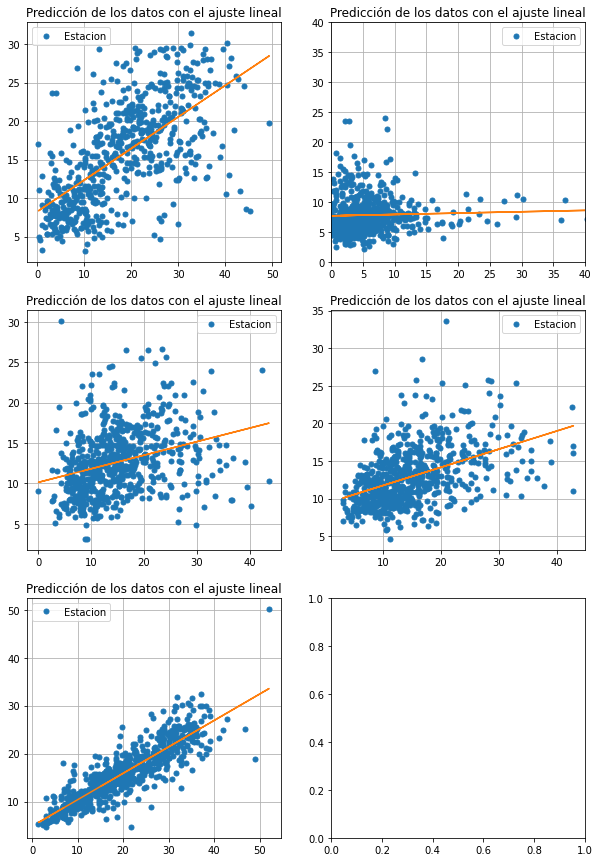

In [55]:
modelado1 = datos_ventana[:datos_ventana.index[0]+(datos_ventana.index[-1]-datos_ventana.index[0])*1/5].copy()
modelado2 = datos_ventana[datos_ventana.index[0]+(datos_ventana.index[-1]-datos_ventana.index[0])*1/5:datos_ventana.index[0]+(datos_ventana.index[-1]-datos_ventana.index[0])*2/5].copy()
modelado3 = datos_ventana[datos_ventana.index[0]+(datos_ventana.index[-1]-datos_ventana.index[0])*2/5:datos_ventana.index[0]+(datos_ventana.index[-1]-datos_ventana.index[0])*3/5].copy()
modelado4 = datos_ventana[datos_ventana.index[0]+(datos_ventana.index[-1]-datos_ventana.index[0])*3/5:datos_ventana.index[0]+(datos_ventana.index[-1]-datos_ventana.index[0])*4/5].copy()
modelado5 = datos_ventana[datos_ventana.index[0]+(datos_ventana.index[-1]-datos_ventana.index[0])*4/5:].copy()

r1 = np.polyfit(modelado1["PM25_est"], modelado1["PM25_ref"], 1)
r2 = np.polyfit(modelado2["PM25_est"], modelado2["PM25_ref"], 1)
r3 = np.polyfit(modelado3["PM25_est"], modelado3["PM25_ref"], 1)
r4 = np.polyfit(modelado4["PM25_est"], modelado4["PM25_ref"], 1)
r5 = np.polyfit(modelado5["PM25_est"], modelado5["PM25_ref"], 1)

print(r1, 
r2,
r3,
r4,
r5)

ax, fig = plt.subplots(3,2, figsize=(10,15))
fig[0,0].plot(modelado1["PM25_est"], modelado1["PM25_ref"], ".", label="Estacion", markersize=10)
fig[0,0].plot(modelado1["PM25_est"], np.polyval(r1, modelado1["PM25_est"]), "-")
fig[0,0].set_title("Predicción de los datos con el ajuste lineal")
# fig[0,0].set_xlim(0,40)
# fig[0,0].set_ylim(0,40)
fig[0,0].grid()
fig[0,0].legend()

fig[0,1].plot(modelado2["PM25_est"], modelado2["PM25_ref"], ".", label="Estacion", markersize=10)
fig[0,1].plot(modelado2["PM25_est"], np.polyval(r2, modelado2["PM25_est"]), "-")
fig[0,1].set_title("Predicción de los datos con el ajuste lineal")
fig[0,1].set_xlim(0,40)
fig[0,1].set_ylim(0,40)
fig[0,1].grid()
fig[0,1].legend()

fig[1,0].plot(modelado3["PM25_est"], modelado3["PM25_ref"], ".", label="Estacion", markersize=10)
fig[1,0].plot(modelado3["PM25_est"], np.polyval(r3, modelado3["PM25_est"]), "-")
fig[1,0].set_title("Predicción de los datos con el ajuste lineal")
# fig[1,0].set_xlim(0,40)
# fig[1,0].set_ylim(0,40)
fig[1,0].grid()
fig[1,0].legend()

fig[1,1].plot(modelado4["PM25_est"], modelado4["PM25_ref"], ".", label="Estacion", markersize=10)
fig[1,1].plot(modelado4["PM25_est"], np.polyval(r4, modelado4["PM25_est"]), "-")
fig[1,1].set_title("Predicción de los datos con el ajuste lineal")
fig[1,1].grid()
fig[1,1].legend()

fig[2,0].plot(modelado5["PM25_est"], modelado5["PM25_ref"], ".", label="Estacion", markersize=10)
fig[2,0].plot(modelado5["PM25_est"], np.polyval(r5, modelado5["PM25_est"]), "-")
fig[2,0].set_title("Predicción de los datos con el ajuste lineal")
fig[2,0].grid()
fig[2,0].legend()

[0.48466038 5.33859706]
[0.51684275 6.01813179]
[ 1.1827301  -2.63892279]


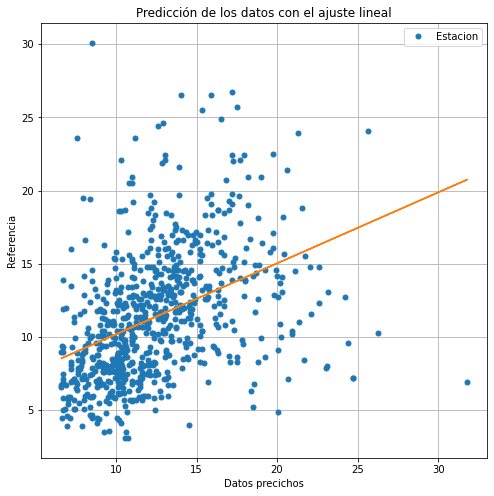

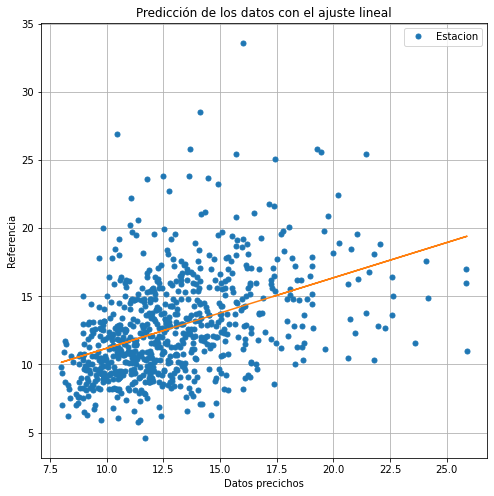

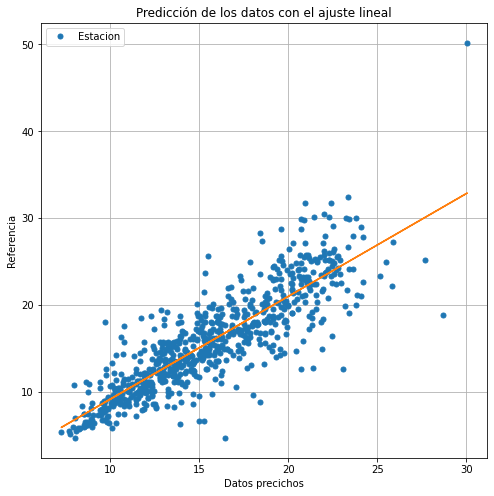

In [114]:
print(np.polyfit(prediccion[:"2019-06-30"], test["PM25_ref"][:"2019-06-30"], 1))
print(np.polyfit(prediccion["2019-07-01":"2019-07-31"], test["PM25_ref"]["2019-07-01":"2019-07-31"], 1))
print(np.polyfit(prediccion["2019-08-01":"2019-08-31"], test["PM25_ref"]["2019-08-01":"2019-08-31"], 1))

plt.figure(figsize=(8,8))
plt.plot(prediccion[:"2019-06-30"], test["PM25_ref"][:"2019-06-30"], ".", label="Estacion", markersize=10)
plt.plot(prediccion[:"2019-06-30"], np.polyval(np.polyfit(prediccion[:"2019-06-30"], test["PM25_ref"][:"2019-06-30"], 1), prediccion[:"2019-06-30"]), "-")
plt.title("Predicción de los datos con el ajuste lineal")
plt.xlabel("Datos precichos")
plt.ylabel("Referencia")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(8,8))
plt.plot(prediccion["2019-07-01":"2019-07-31"], test["PM25_ref"]["2019-07-01":"2019-07-31"], ".", label="Estacion", markersize=10)
plt.plot(prediccion["2019-07-01":"2019-07-31"], np.polyval(np.polyfit(prediccion["2019-07-01":"2019-07-31"], test["PM25_ref"]["2019-07-01":"2019-07-31"], 1), prediccion["2019-07-01":"2019-07-31"]), "-")
plt.title("Predicción de los datos con el ajuste lineal")
plt.xlabel("Datos precichos")
plt.ylabel("Referencia")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(8,8))
plt.plot(prediccion["2019-08-01":"2019-08-31"], test["PM25_ref"]["2019-08-01":"2019-08-31"], ".", label="Estacion", markersize=10)
plt.plot(prediccion["2019-08-01":"2019-08-31"], np.polyval(np.polyfit(prediccion["2019-08-01":"2019-08-31"], test["PM25_ref"]["2019-08-01":"2019-08-31"], 1), prediccion["2019-08-01":"2019-08-31"]), "-")
plt.title("Predicción de los datos con el ajuste lineal")
plt.xlabel("Datos precichos")
plt.ylabel("Referencia")
plt.legend()
plt.grid()
plt.show()


In [7]:
#Calculamos la distancia euclidea entre los datos de la estacion y la referencia para diferentes ventanas móbiles
distancias_sindiv = []
tiempo_ejecucion_sindiv = []
for i in pd.timedelta_range("5T", "60T", freq="5T"):
    st = time.time()
    med = MediaMovil([referencia, estacion], ventana, i)
    distancias_sindiv.append(distancia(med["PM25_ref"],med["PM25_est"]))
    et = time.time()
    tiempo_ejecucion_sindiv.append(et - st)

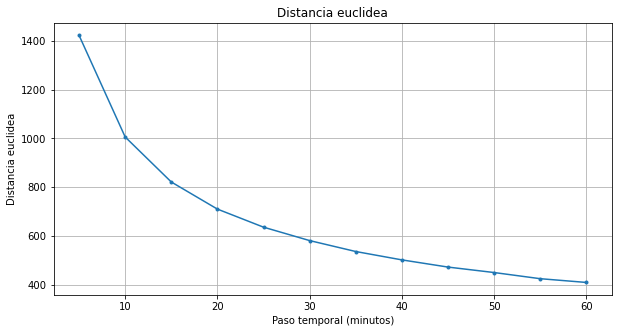

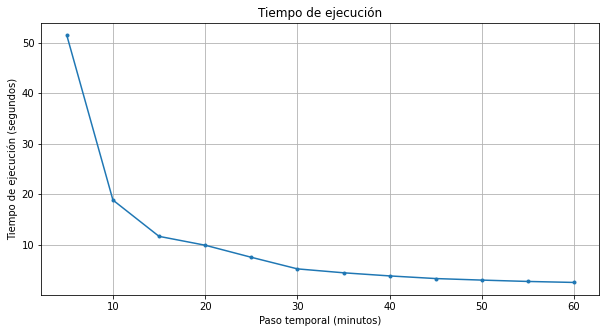

In [8]:
#Verificamos gráficamente la relación
plt.figure(figsize=(10,5))
plt.plot(range(5, 61, 5),  distancias_sindiv, ".-")
plt.title("Distancia euclidea")
plt.xlabel("Paso temporal (minutos)")
plt.ylabel("Distancia euclidea")
plt.grid()
plt.show()
plt.figure(figsize=(10,5))
plt.plot(range(5,61,5), np.array(tiempo_ejecucion_sindiv), ".-")
plt.title("Tiempo de ejecución")
plt.xlabel("Paso temporal (minutos)")
plt.ylabel("Tiempo de ejecución (segundos)")
plt.grid()
plt.show()


In [9]:
#Obtenemos la posicion de la relacion minima entre distancia y tiempo de ejecucion
pd.timedelta_range("5T", "60T", freq="5T")[np.argmin(np.array(distancias_sindiv)/np.array(tiempo_ejecucion_sindiv))]

Timedelta('0 days 00:05:00')

In [10]:
#Calculamos la distancia euclidea entre los datos de la estacion y la referencia para diferentes ventanas móbiles
distancias = []
tiempo_ejecucion = []
for i in pd.timedelta_range("5T", "60T", freq="5T"):
    st = time.time()
    med = MediaMovil([referencia, estacion], ventana, i)
    distancias.append(distancia(med["PM25_ref"],med["PM25_est"])/len(med))
    et = time.time()
    tiempo_ejecucion.append(et - st)

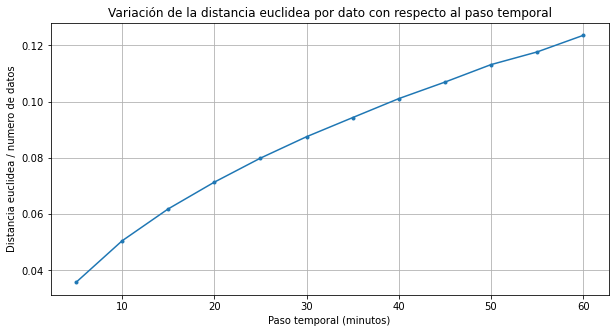

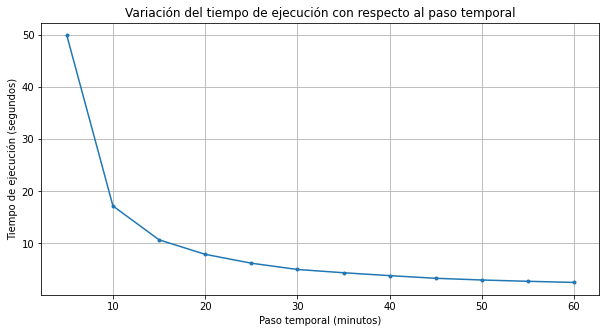

In [11]:
#Verificamos gráficamente la relación
plt.figure(figsize=(10,5))
plt.plot(range(5, 61, 5),  distancias, ".-")
plt.title("Variación de la distancia euclidea por dato con respecto al paso temporal")
plt.xlabel("Paso temporal (minutos)")
plt.ylabel("Distancia euclidea / numero de datos")
plt.grid()
plt.show()
plt.figure(figsize=(10,5))
plt.plot(range(5,61,5), np.array(tiempo_ejecucion), ".-")
plt.title("Variación del tiempo de ejecución con respecto al paso temporal")
plt.xlabel("Paso temporal (minutos)")
plt.ylabel("Tiempo de ejecución (segundos)")
plt.grid()
plt.show()

29.180082015486946 198.74153592854034


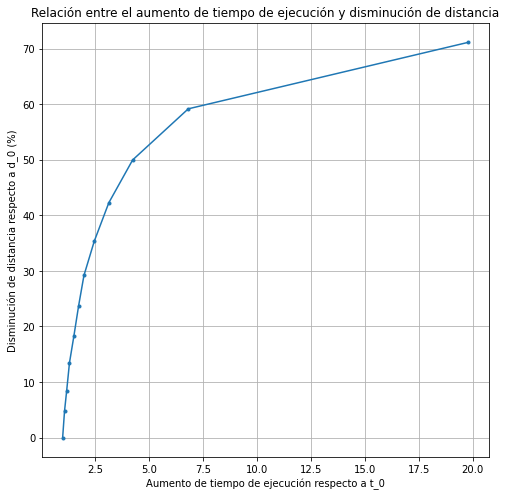

In [12]:
print(100-distancias[5]/distancias[-1]*100, tiempo_ejecucion[5]/tiempo_ejecucion[-1]*100)
plt.figure(figsize=(8,8))
plt.plot(np.array(tiempo_ejecucion)/tiempo_ejecucion[-1], 100-np.array(distancias)/distancias[-1]*100, ".-")
plt.title("Relación entre el aumento de tiempo de ejecución y disminución de distancia")
plt.xlabel("Aumento de tiempo de ejecución respecto a t_0")
plt.ylabel("Disminución de distancia respecto a d_0 (%)")
plt.grid()
plt.show()